In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Loading Datasets

In [ ]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
flightsinfo = pd.read_csv("drive/My Drive/flights.csv",nrows=50000)
airport = pd.read_csv('drive/My Drive/airports.csv')
airlines = pd.read_csv('drive/My Drive/airlines.csv')
flightsinfo

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2015,1,4,7,AA,1524,N499AA,DFW,LAS,915,910.0,-5.0,24.0,934.0,175,180.0,150.0,1055,1004.0,6.0,1010,1010.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49996,2015,1,4,7,AA,2316,N3FNAA,STX,MIA,915,915.0,0.0,20.0,935.0,187,191.0,155.0,1139,1110.0,16.0,1122,1126.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49997,2015,1,4,7,AS,5,N566AS,DCA,LAX,915,952.0,37.0,13.0,1005.0,355,355.0,329.0,2311,1234.0,13.0,1210,1247.0,37.0,0,0,NaN,37.0,0.0,0.0,0.0,0.0
49998,2015,1,4,7,DL,688,N893AT,ATL,ICT,915,922.0,7.0,13.0,935.0,145,135.0,115.0,782,1030.0,7.0,1040,1037.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploring and Analyzing Dataset
We are displaying data type of every feature in flights dataset. This will help in understadning of data and further analysis.

In [ ]:
flightsinfo.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME           int64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [ ]:
list(flightsinfo.columns) 

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [ ]:
flightsinfo.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flightsinfo.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,50000.0,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,48896.000000,48896.000000,48873.000000,48873.000000,50000.000000,48753.000000,48753.000000,50000.00000,48839.000000,48839.000000,50000.000000,48839.000000,48753.000000,50000.00000,50000.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000
mean,2015.0,1.0,2.184680,5.184680,2235.149800,1295.894840,1310.849456,15.596020,16.594827,1333.144824,145.339160,144.290505,119.769737,851.14946,1444.159422,7.933844,1469.676400,1447.643543,13.596579,0.00218,0.022760,12.036020,0.100078,18.305945,22.047832,1.937046
std,0.0,0.0,0.929296,0.929296,1818.758779,491.267911,508.775569,40.758942,9.553458,509.260635,77.073412,77.140845,75.103894,616.67447,533.735425,6.339113,505.892758,538.514420,43.375000,0.04664,0.149139,21.476128,2.033530,43.343044,39.313475,12.939070
min,2015.0,1.0,1.000000,4.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,23.000000,18.000000,11.000000,31.00000,1.000000,1.000000,1.000000,1.000000,-54.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,1.000000,4.000000,770.000000,845.000000,852.000000,-3.000000,11.000000,908.000000,88.000000,86.000000,63.000000,396.00000,1032.000000,4.000000,1045.000000,1037.000000,-9.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,2.000000,5.000000,1677.500000,1256.000000,1308.000000,1.000000,14.000000,1320.000000,127.000000,127.000000,101.000000,689.00000,1442.000000,6.000000,1451.000000,1445.000000,2.000000,0.00000,0.000000,4.000000,0.000000,5.000000,7.000000,0.000000
75%,2015.0,1.0,3.000000,6.000000,3341.000000,1715.000000,1733.000000,19.000000,19.000000,1746.000000,179.000000,179.000000,153.000000,1090.00000,1902.000000,9.000000,1905.000000,1906.000000,22.000000,0.00000,0.000000,18.000000,0.000000,20.000000,29.000000,0.000000
max,2015.0,1.0,4.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,718.000000,712.000000,676.000000,4983.00000,2400.000000,111.000000,2359.000000,2400.000000,1384.000000,1.00000,1.000000,570.000000,107.000000,1380.000000,891.000000,453.000000


In [ ]:
airlinecompanies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [ ]:
airlinecompanies

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}

In [ ]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [ ]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE']) #dropping na values of Latitude and Longitude

In [ ]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [ ]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [ ]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [ ]:
flightsinfo.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER               59
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1104
DEPARTURE_DELAY         1104
TAXI_OUT                1127
WHEELS_OFF              1127
SCHEDULED_TIME             0
ELAPSED_TIME            1247
AIR_TIME                1247
DISTANCE                   0
WHEELS_ON               1161
TAXI_IN                 1161
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1161
ARRIVAL_DELAY           1247
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    48862
AIR_SYSTEM_DELAY       34592
SECURITY_DELAY         34592
AIRLINE_DELAY          34592
LATE_AIRCRAFT_DELAY    34592
WEATHER_DELAY          34592
dtype: int64

## Data Cleaning

In [ ]:
flightsinfo1 = flightsinfo.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])  #dropping missing values in the dataset

In [ ]:
flightsinfo1.shape

(48753, 31)

In [ ]:
flightsinfo1.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
WHEELS_ON                  0
TAXI_IN                    0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    48753
AIR_SYSTEM_DELAY       33345
SECURITY_DELAY         33345
AIRLINE_DELAY          33345
LATE_AIRCRAFT_DELAY    33345
WEATHER_DELAY          33345
dtype: int64

In [ ]:
flightsinfo_modified = flightsinfo1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flightsinfo_modified = flightsinfo_modified.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [ ]:
flightsinfo_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15408 entries, 27 to 49997
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AIRLINE              15408 non-null  object 
 1   ORIGIN_AIRPORT       15408 non-null  object 
 2   DESTINATION_AIRPORT  15408 non-null  object 
 3   DEPARTURE_DELAY      15408 non-null  float64
 4   TAXI_OUT             15408 non-null  float64
 5   ELAPSED_TIME         15408 non-null  float64
 6   DISTANCE             15408 non-null  int64  
 7   TAXI_IN              15408 non-null  float64
 8   ARRIVAL_DELAY        15408 non-null  float64
 9   AIR_SYSTEM_DELAY     15408 non-null  float64
 10  SECURITY_DELAY       15408 non-null  float64
 11  AIRLINE_DELAY        15408 non-null  float64
 12  LATE_AIRCRAFT_DELAY  15408 non-null  float64
 13  WEATHER_DELAY        15408 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
Flight_Delays = flightsinfo_modified

In [ ]:
flightsinfo2 = flightsinfo1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [ ]:
flightsinfo2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [ ]:
flightsinfo2.shape

(48753, 25)

In [ ]:
flightsinfo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48753 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 48753 non-null  int64  
 1   MONTH                48753 non-null  int64  
 2   DAY                  48753 non-null  int64  
 3   DAY_OF_WEEK          48753 non-null  int64  
 4   AIRLINE              48753 non-null  object 
 5   FLIGHT_NUMBER        48753 non-null  int64  
 6   TAIL_NUMBER          48753 non-null  object 
 7   ORIGIN_AIRPORT       48753 non-null  object 
 8   DESTINATION_AIRPORT  48753 non-null  object 
 9   SCHEDULED_DEPARTURE  48753 non-null  int64  
 10  DEPARTURE_TIME       48753 non-null  float64
 11  DEPARTURE_DELAY      48753 non-null  float64
 12  TAXI_OUT             48753 non-null  float64
 13  WHEELS_OFF           48753 non-null  float64
 14  SCHEDULED_TIME       48753 non-null  int64  
 15  ELAPSED_TIME         48753 non-null 

In [ ]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [ ]:
flightsinfo2.DEPARTURE_TIME

0        2354.0
1           2.0
2          18.0
3          15.0
4          24.0
          ...  
49995     910.0
49996     915.0
49997     952.0
49998     922.0
49999    1000.0
Name: DEPARTURE_TIME, Length: 48753, dtype: float64

The times are not in the correct format so i will transform them into HH:MM format


In [ ]:
def CreateTimeFormatted(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [ ]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Arrival'] =flightsinfo1['SCHEDULED_ARRIVAL'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Departure'] =flightsinfo1['SCHEDULED_DEPARTURE'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Arrival'] =flightsinfo2['ARRIVAL_TIME'].apply(CreateTimeFormatted)

In [ ]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival'],
      dtype='object')

In [ ]:
flightsinfo2 = flightsinfo2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [ ]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_x', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival',
       'IATA_CODE', 'AIRLINE_y'],
      dtype='object')

In [ ]:
flightsinfo2 = flightsinfo2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [ ]:
flightsinfo2 = flightsinfo2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [ ]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Scheduled_Arrival',
       'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE'],
      dtype='object')

In [ ]:
flightsinfo2 = flightsinfo2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flightsinfo2 = flightsinfo2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [ ]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Scheduled_Arrival',
       'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE', 'IATA_CODE_x',
       'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x',
       'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y',
       'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [ ]:
flightsinfo2 = flightsinfo2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [ ]:
flightsinfo2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,Actual_Departure,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,STATE_x,COUNTRY_x,LATITUDE_x,LONGITUDE_x,Dest_Airport_Code,Dest_Airport_Name,Destination_city,STATE_y,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,23:54:00,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,-4.0,17.0,58.0,204,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,00:41:00,05:09:00,00:45:00,04:55:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,-15.0,17.0,157.0,218,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,01:40:00,06:33:00,01:55:00,05:58:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,-11.0,15.0,224.0,200,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,02:09:00,06:40:00,02:20:00,06:28:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,-8.0,16.0,513.0,205,199.0,179.0,1448,912.0,4.0,930,916.0,-14.0,0,0,04:57:00,09:30:00,05:05:00,09:16:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48688,2015,1,1,4,2570,N876AS,MEI,PIB,1440,1447.0,7.0,11.0,1458.0,35,38.0,24.0,69,1522.0,3.0,1515,1525.0,10.0,0,0,14:47:00,15:15:00,14:40:00,15:25:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,MS,USA,32.33313,-88.75121,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,USA,31.46715,-89.33706
48689,2015,1,1,4,2571,N879AS,MEI,PIB,2055,2051.0,-4.0,5.0,2056.0,35,29.0,21.0,69,2117.0,3.0,2130,2120.0,-10.0,0,0,20:51:00,21:30:00,20:55:00,21:20:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,MS,USA,32.33313,-88.75121,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,USA,31.46715,-89.33706
48690,2015,1,2,5,2570,N830AS,MEI,PIB,1440,1537.0,57.0,8.0,1545.0,35,29.0,17.0,69,1602.0,4.0,1515,1606.0,51.0,0,0,15:37:00,15:15:00,14:40:00,16:06:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,MS,USA,32.33313,-88.75121,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,USA,31.46715,-89.33706
48691,2015,1,2,5,2571,N877AS,MEI,PIB,2055,2351.0,176.0,9.0,2400.0,35,34.0,21.0,69,21.0,4.0,2130,25.0,175.0,0,0,23:51:00,21:30:00,20:55:00,00:25:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,MS,USA,32.33313,-88.75121,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,USA,31.46715,-89.33706


In [ ]:
data_vizual = pd.DataFrame(flightsinfo2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [ ]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [ ]:
data_vizual = data_vizual.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [ ]:
data_vizual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48672 entries, 0 to 48692
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AIRLINE              48672 non-null  object 
 1   Org_Airport_Name     48672 non-null  object 
 2   Origin_city          48672 non-null  object 
 3   Dest_Airport_Name    48672 non-null  object 
 4   Destination_city     48672 non-null  object 
 5   ORIGIN_AIRPORT       48672 non-null  object 
 6   DESTINATION_AIRPORT  48672 non-null  object 
 7   DISTANCE             48672 non-null  int64  
 8   Actual_Departure     48672 non-null  object 
 9   Scheduled_Departure  48672 non-null  object 
 10  DEPARTURE_DELAY      48672 non-null  float64
 11  Actual_Arrival       48672 non-null  object 
 12  Scheduled_Arrival    48672 non-null  object 
 13  ARRIVAL_DELAY        48672 non-null  float64
 14  SCHEDULED_TIME       48672 non-null  int64  
 15  ELAPSED_TIME         48672 non-null 

In [ ]:
Flights = data_vizual
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Scheduled_Departure,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,00:05:00,-11.0,04:08:00,04:30:00,-22.0,205,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,00:45:00,-4.0,04:55:00,05:09:00,-14.0,204,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,01:55:00,-15.0,05:58:00,06:33:00,-35.0,218,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,02:20:00,-11.0,06:28:00,06:40:00,-12.0,200,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,05:05:00,-8.0,09:16:00,09:30:00,-14.0,205,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48688,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,14:47:00,14:40:00,7.0,15:25:00,15:15:00,10.0,35,38.0,24.0,3.0,11.0,0
48689,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,20:51:00,20:55:00,-4.0,21:20:00,21:30:00,-10.0,35,29.0,21.0,3.0,5.0,0
48690,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,15:37:00,14:40:00,57.0,16:06:00,15:15:00,51.0,35,29.0,17.0,4.0,8.0,0
48691,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,23:51:00,20:55:00,176.0,00:25:00,21:30:00,175.0,35,34.0,21.0,4.0,9.0,0


### Data Visualization

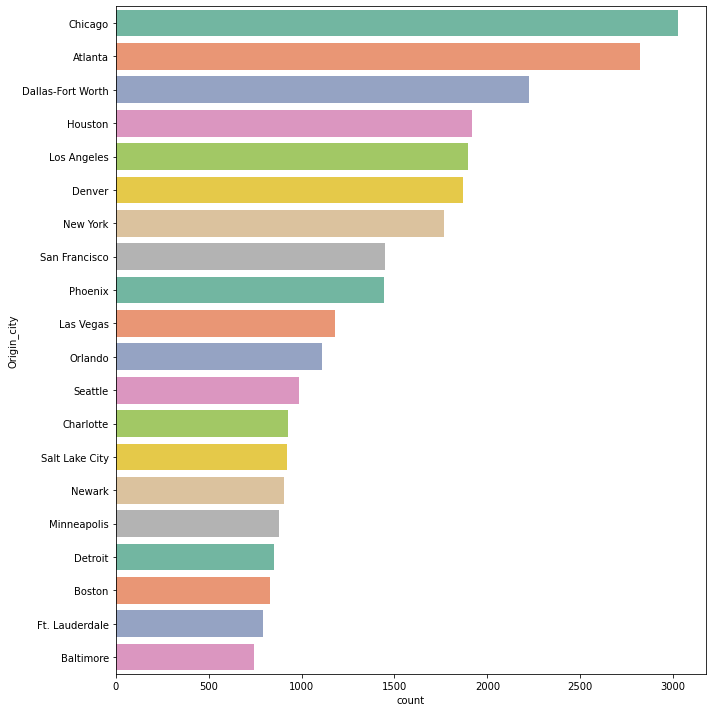

In [ ]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(y=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index,palette="Set2")
axis.set_yticklabels(axis.get_yticklabels())
plt.tight_layout()
plt.show()

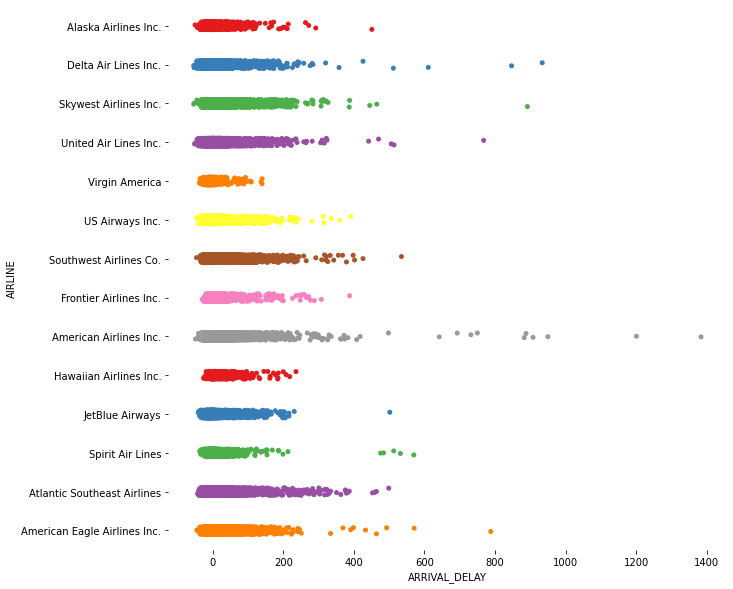

In [ ]:
axis = plt.subplots(figsize=(10,10))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, dodge=True, jitter=True,palette="Set1")
plt.show()

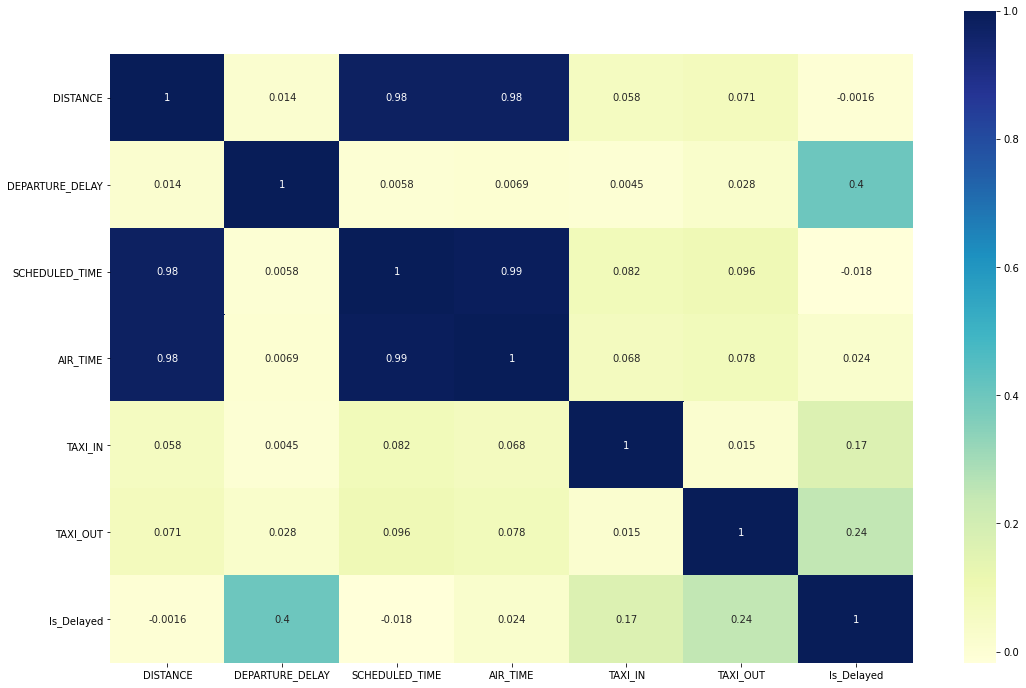

In [ ]:
axis = plt.subplots(figsize=(18,12))

Flightscorr=pd.DataFrame(Flights[['DISTANCE','DEPARTURE_DELAY','SCHEDULED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT']])
Flightscorr['Is_Delayed'] = np.where(Flights['ARRIVAL_DELAY']<=0, 0,1)
sns.heatmap(Flightscorr.corr(),annot = True,cmap="YlGnBu")

b, t = plt.ylim() # discover the values for bottom and top
#b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

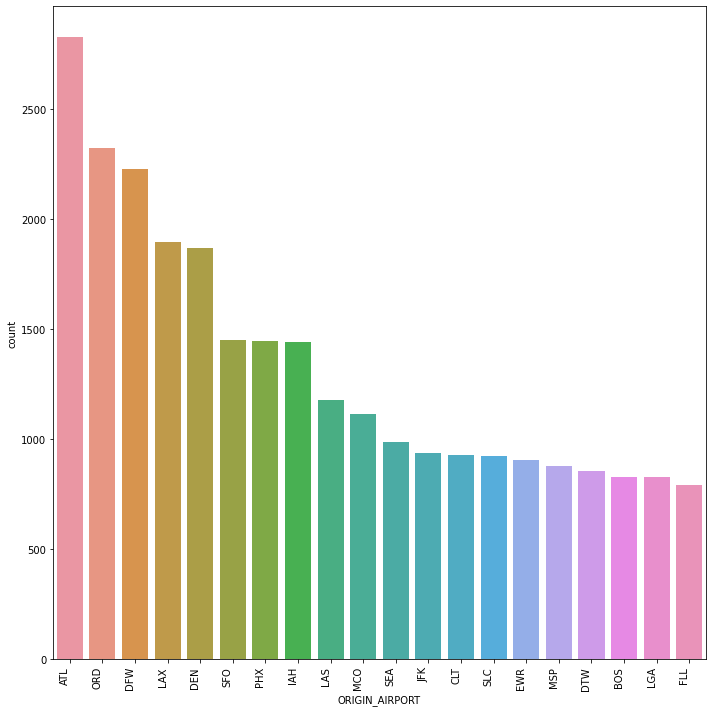

In [ ]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['ORIGIN_AIRPORT'], data =Flights,
              order=Flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

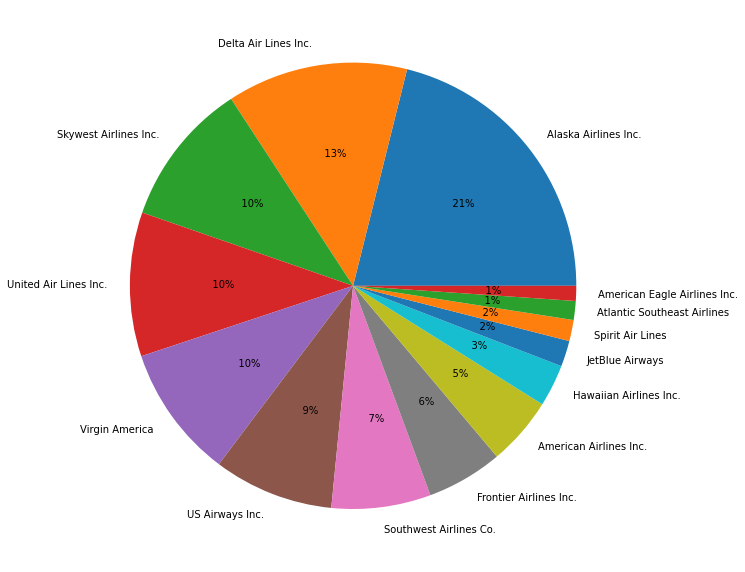

In [ ]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

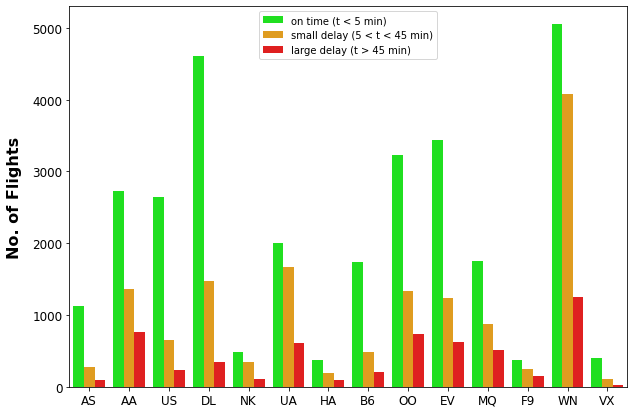

In [ ]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flightsinfo['DELAY_LEVEL'] = flightsinfo['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="AIRLINE", hue='DELAY_LEVEL', data=flightsinfo, palette= ["#00FF00","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [ ]:
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [ ]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Scheduled_Departure', 'DEPARTURE_DELAY',
       'Actual_Arrival', 'Scheduled_Arrival', 'ARRIVAL_DELAY',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'TAXI_OUT',
       'DIVERTED'],
      dtype='object')

## Predicting whether the flight is Delayed or Not

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

Applying Label encoder to convert text values to numbers

In [ ]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])

Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])

mapping

{'ABE': 0,
 'ABI': 1,
 'ABQ': 2,
 'ABR': 3,
 'ABY': 4,
 'ACT': 5,
 'ACV': 6,
 'ACY': 7,
 'ADK': 8,
 'ADQ': 9,
 'AEX': 10,
 'AGS': 11,
 'ALB': 12,
 'ALO': 13,
 'AMA': 14,
 'ANC': 15,
 'APN': 16,
 'ASE': 17,
 'ATL': 18,
 'ATW': 19,
 'AUS': 20,
 'AVL': 21,
 'AVP': 22,
 'AZO': 23,
 'BDL': 24,
 'BET': 25,
 'BFL': 26,
 'BHM': 27,
 'BIL': 28,
 'BIS': 29,
 'BJI': 30,
 'BLI': 31,
 'BMI': 32,
 'BNA': 33,
 'BOI': 34,
 'BOS': 35,
 'BPT': 36,
 'BQK': 37,
 'BQN': 38,
 'BRD': 39,
 'BRO': 40,
 'BRW': 41,
 'BTM': 42,
 'BTR': 43,
 'BTV': 44,
 'BUF': 45,
 'BUR': 46,
 'BWI': 47,
 'BZN': 48,
 'CAE': 49,
 'CAK': 50,
 'CDC': 51,
 'CDV': 52,
 'CEC': 53,
 'CHA': 54,
 'CHO': 55,
 'CHS': 56,
 'CID': 57,
 'CIU': 58,
 'CLD': 59,
 'CLE': 60,
 'CLL': 61,
 'CLT': 62,
 'CMH': 63,
 'CMI': 64,
 'CMX': 65,
 'CNY': 66,
 'COD': 67,
 'COS': 68,
 'COU': 69,
 'CPR': 70,
 'CRP': 71,
 'CRW': 72,
 'CSG': 73,
 'CVG': 74,
 'CWA': 75,
 'DAB': 76,
 'DAL': 77,
 'DAY': 78,
 'DBQ': 79,
 'DCA': 80,
 'DEN': 81,
 'DFW': 82,
 'DHN': 83,
 '

In [ ]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Actual_Departure','ELAPSED_TIME','DIVERTED','TAXI_IN'], axis = 1)

Creating a new feature which has value only as 0 or 1 depending on it it is delayed or not

In [ ]:
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)

In [ ]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,AIR_TIME,TAXI_OUT,Is_Delayed
0,0,15,265,1448,-11.0,-22.0,205,169.0,21.0,0
1,0,15,265,1448,-4.0,-14.0,204,173.0,17.0,0
2,0,15,265,1448,-15.0,-35.0,218,170.0,17.0,0
3,0,15,265,1448,-11.0,-12.0,200,176.0,15.0,0
4,0,15,265,1448,-8.0,-14.0,205,179.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...
48688,3,187,229,69,7.0,10.0,35,24.0,11.0,1
48689,3,187,229,69,-4.0,-10.0,35,21.0,5.0,0
48690,3,187,229,69,57.0,51.0,35,17.0,8.0,1
48691,3,187,229,69,176.0,175.0,35,21.0,9.0,1


In [ ]:
X = Flights1.drop(['ARRIVAL_DELAY','Is_Delayed'],axis = 1)
X.shape
y = Flights1['Is_Delayed']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Delayed, dtype: int64

In [ ]:
X

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,TAXI_OUT
0,0,15,265,1448,-11.0,205,169.0,21.0
1,0,15,265,1448,-4.0,204,173.0,17.0
2,0,15,265,1448,-15.0,218,170.0,17.0
3,0,15,265,1448,-11.0,200,176.0,15.0
4,0,15,265,1448,-8.0,205,179.0,16.0
...,...,...,...,...,...,...,...,...
48688,3,187,229,69,7.0,35,24.0,11.0
48689,3,187,229,69,-4.0,35,21.0,5.0
48690,3,187,229,69,57.0,35,17.0,8.0
48691,3,187,229,69,176.0,35,21.0,9.0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48688    1
48689    0
48690    1
48691    1
48692    1
Name: Is_Delayed, Length: 48672, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [ ]:
y_train.value_counts()

1    20839
0    18098
Name: Is_Delayed, dtype: int64

### KNN Classification

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifierKNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifierKNN.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting the Test set results
y_pred = classifierKNN.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
score = classifierKNN.score(X_test,y_test)

In [ ]:
cm

array([[3998,  572],
       [1259, 3906]])

In [ ]:
score

0.8119157678479713

In [ ]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.8118989684035103
Precision Score : 0.8163871001067675
Recall Score : 0.8155399179378116


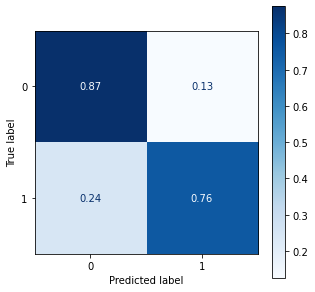

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(classifierKNN, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8494,1,1
2838,0,0
10520,0,0
16918,1,1
2164,1,0
...,...,...
16902,1,1
18219,1,0
3858,0,0
1834,0,0


In [ ]:
X_val=np.array([[3,187,229,69,1.0,35,24.0,11.0]])

In [ ]:
X_val

array([[  3., 187., 229.,  69.,   1.,  35.,  24.,  11.]])

In [ ]:
y_pred_val = classifierKNN.predict(X_val)

In [ ]:
y_pred_val

array([0])

### Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = None)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Predicting the Test set results
y_pred = classifierDT.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
score = classifierDT.score(X_test,y_test)

In [ ]:
cm

array([[3797,  773],
       [ 763, 4402]])

In [ ]:
score

0.8422187981510015

In [ ]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.8416070471440888
Precision Score : 0.8416517289600813
Recall Score : 0.8415641595404179


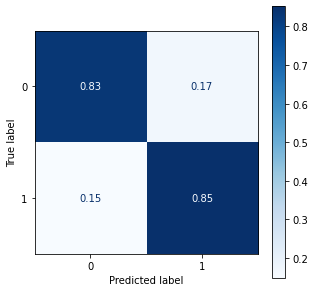

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(classifierDT, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8494,1,1
2838,0,0
10520,0,0
16918,1,1
2164,1,1
...,...,...
16902,1,1
18219,1,1
3858,0,0
1834,0,0


In [ ]:
X_val=np.array([[3,187,229,69,1.0,35,24.0,11.0]])

In [ ]:
X_val

array([[  3., 187., 229.,  69.,   1.,  35.,  24.,  11.]])

In [ ]:
y_pred_val = classifierDT.predict(X_val)

In [ ]:
y_pred_val

array([0])

### Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(criterion = 'entropy', random_state = None,n_estimators=1000)
classifierRF.fit(X_train, y_train)
X_train

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,TAXI_OUT
37210,9,35,185,861,13.0,180,159.0,12.0
6204,5,81,164,628,-6.0,112,90.0,10.0
25825,9,81,35,1754,43.0,225,186.0,24.0
14432,9,165,277,226,0.0,60,39.0,10.0
24944,4,228,88,1671,2.0,225,183.0,17.0
...,...,...,...,...,...,...,...,...
44583,8,207,150,546,-3.0,124,101.0,12.0
30290,12,100,142,1400,9.0,238,212.0,59.0
6640,9,2,164,486,13.0,95,72.0,7.0
35356,11,108,62,631,0.0,114,89.0,10.0


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Predicting the Test set results
y_pred = classifierRF.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
score = classifierRF.score(X_test,y_test)

In [ ]:
cm

array([[4108,  462],
       [ 708, 4457]])

In [ ]:
score

0.8798151001540832

In [ ]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,TAXI_OUT
8494,8,20,166,1242,34.0,212,162.0,13.0
2838,8,26,227,425,-1.0,93,68.0,14.0
10520,12,100,266,2565,1.0,399,355.0,11.0
16918,8,218,82,802,28.0,156,138.0,20.0
2164,12,218,227,1440,-4.0,238,217.0,40.0
...,...,...,...,...,...,...,...,...
16902,1,218,82,802,20.0,155,122.0,18.0
18219,2,171,82,785,3.0,155,140.0,9.0
3858,1,165,217,1514,-10.0,225,183.0,13.0
1834,11,272,227,621,-7.0,113,85.0,18.0


In [ ]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.8796604368182612
Precision Score : 0.879534252228291
Recall Score : 0.8809147159068041


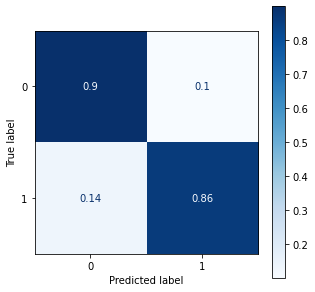

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(classifierRF, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8494,1,1
2838,0,0
10520,0,0
16918,1,1
2164,1,1
...,...,...
16902,1,1
18219,1,1
3858,0,0
1834,0,0


In [ ]:
X_val=np.array([[3,187,229,69,1.0,35,24.0,11.0]])

In [ ]:
X_val

array([[  3., 187., 229.,  69.,   1.,  35.,  24.,  11.]])

In [ ]:
y_pred_val = classifierRF.predict(X_val)

In [ ]:
y_pred_val

array([0])

### XGBoost Classification

In [ ]:
from xgboost import XGBClassifier
classifierXGB = XGBClassifier(n_estimators=2000)
classifierXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Predicting the Test set results
y_pred = classifierXGB.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
score = classifierXGB.score(X_test,y_test)

In [ ]:
cm

array([[4254,  316],
       [ 412, 4753]])

In [ ]:
score

0.9252182845403184

In [ ]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,TAXI_OUT
8494,8,20,166,1242,34.0,212,162.0,13.0
2838,8,26,227,425,-1.0,93,68.0,14.0
10520,12,100,266,2565,1.0,399,355.0,11.0
16918,8,218,82,802,28.0,156,138.0,20.0
2164,12,218,227,1440,-4.0,238,217.0,40.0
...,...,...,...,...,...,...,...,...
16902,1,218,82,802,20.0,155,122.0,18.0
18219,2,171,82,785,3.0,155,140.0,9.0
3858,1,165,217,1514,-10.0,225,183.0,13.0
1834,11,272,227,621,-7.0,113,85.0,18.0


In [ ]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.9250212841086357
Precision Score : 0.9246809798463163
Recall Score : 0.925542862347775


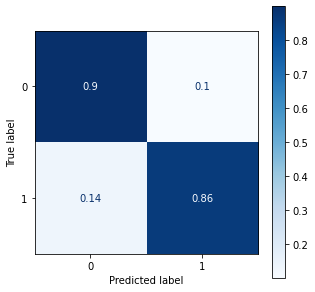

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(classifierRF, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8494,1,1
2838,0,0
10520,0,0
16918,1,1
2164,1,1
...,...,...
16902,1,1
18219,1,1
3858,0,0
1834,0,0


In [ ]:
X_val=np.array([[3,187,229,69,1.0,35,24.0,11.0]])

In [ ]:
X_val

array([[  3., 187., 229.,  69.,   1.,  35.,  24.,  11.]])

In [ ]:
y_pred_val = classifierRF.predict(X_val)

In [ ]:
y_pred_val

array([0])

testing

In [ ]:
totalcount=Flights1.loc[(Flights1['AIRLINE'] == 0) & (Flights1['ORIGIN_AIRPORT'] == 15) & (Flights1['DESTINATION_AIRPORT'] == 265)]['Is_Delayed'].count()
totalcount

47

In [ ]:
delayedcount=Flights1.loc[(Flights1['AIRLINE'] == 0) & (Flights1['ORIGIN_AIRPORT'] == 15) & (Flights1['DESTINATION_AIRPORT'] == 265) & (Flights1['Is_Delayed'] == 1)]['Is_Delayed'].count()
delayedcount

5

In [ ]:
nodelayedcount=Flights1.loc[(Flights1['AIRLINE'] == 0) & (Flights1['ORIGIN_AIRPORT'] == 15) & (Flights1['DESTINATION_AIRPORT'] == 265) & (Flights1['Is_Delayed'] == 0)]['Is_Delayed'].count()
nodelayedcount

42

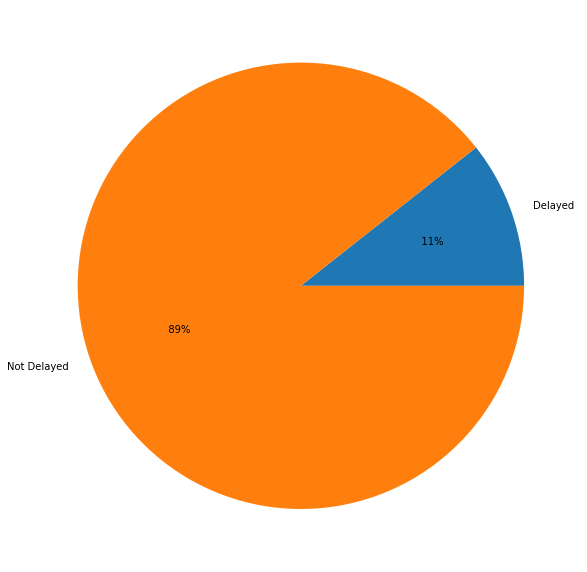

In [ ]:
axis = plt.subplots(figsize=(10,14))
Name = ['Delayed','Not Delayed']
values = [(delayedcount/totalcount)*100,(nodelayedcount/totalcount)*100]

plt.pie(values,labels=Name,autopct='%5.0f%%')
plt.show() 
# plt.pie(size,labels=Name,autopct='%5.0f%%')
# plt.show()

In [ ]:
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city','TAXI_IN','TAXI_OUT','DIVERTED','SCHEDULED_TIME'],axis = 1)
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)
Flights1.loc[(Flights1['Is_Delayed'] == 1) &  (Flights1['DEPARTURE_DELAY'] <0)].sort_values(by=['DEPARTURE_DELAY'])[:10]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Scheduled_Departure,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,ELAPSED_TIME,AIR_TIME,Is_Delayed
31440,Atlantic Southeast Airlines,XNA,IAH,438,17:40:00,18:00:00,-20.0,19:52:00,19:46:00,6.0,132.0,82.0,1
46067,JetBlue Airways,DCA,CHS,444,11:48:00,12:05:00,-17.0,13:49:00,13:48:00,1.0,121.0,72.0,1
15498,Alaska Airlines Inc.,SAN,SLC,626,20:48:00,21:05:00,-17.0,00:07:00,23:57:00,10.0,139.0,97.0,1
17918,American Airlines Inc.,JAC,DFW,1047,07:43:00,08:00:00,-17.0,12:11:00,12:00:00,11.0,208.0,138.0,1
7493,Skywest Airlines Inc.,SLC,LAX,590,07:08:00,07:25:00,-17.0,08:48:00,08:30:00,18.0,160.0,82.0,1
5597,American Eagle Airlines Inc.,HPN,ORD,738,18:14:00,18:30:00,-16.0,20:53:00,20:25:00,28.0,219.0,140.0,1
48376,Spirit Air Lines,MCO,ACY,852,10:26:00,10:42:00,-16.0,12:53:00,12:50:00,3.0,147.0,104.0,1
13443,Atlantic Southeast Airlines,XNA,DEN,616,07:45:00,08:00:00,-15.0,09:27:00,09:10:00,17.0,162.0,98.0,1
12246,Skywest Airlines Inc.,TUS,DEN,639,09:08:00,09:23:00,-15.0,11:25:00,11:20:00,5.0,137.0,91.0,1
13014,Atlantic Southeast Airlines,SDF,DEN,1024,09:05:00,09:19:00,-14.0,10:44:00,10:27:00,17.0,219.0,166.0,1


In [ ]:
Flights1.loc[(Flights1['Is_Delayed'] == 0) &  (Flights1['DEPARTURE_DELAY'] >0)].sort_values(by=['DEPARTURE_DELAY'])[-10:]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Scheduled_Departure,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,ELAPSED_TIME,AIR_TIME,Is_Delayed
37564,Southwest Airlines Co.,HOU,MDW,937,07:40:00,07:10:00,30.0,09:44:00,09:45:00,-1.0,124.0,111.0,0
10960,United Air Lines Inc.,IAH,SFO,1635,18:16:00,17:45:00,31.0,20:06:00,20:07:00,-1.0,230.0,207.0,0
38214,Delta Air Lines Inc.,LGA,PBI,1035,12:31:00,12:00:00,31.0,15:08:00,15:16:00,-8.0,157.0,140.0,0
8620,American Airlines Inc.,MIA,LAX,2342,20:32:00,20:00:00,32.0,22:53:00,22:53:00,0.0,321.0,298.0,0
10716,United Air Lines Inc.,ORD,SFO,1846,08:52:00,08:18:00,34.0,10:52:00,11:00:00,-8.0,240.0,212.0,0
29667,Delta Air Lines Inc.,ATL,TUS,1541,20:16:00,19:40:00,36.0,21:56:00,21:58:00,-2.0,220.0,205.0,0
11073,Skywest Airlines Inc.,AUS,SFO,1504,06:37:00,06:00:00,37.0,08:09:00,08:09:00,0.0,212.0,196.0,0
7657,United Air Lines Inc.,EWR,LAX,2454,19:37:00,19:00:00,37.0,22:28:00,22:30:00,-2.0,351.0,332.0,0
24634,Spirit Air Lines,LGA,FLL,1076,16:08:00,15:30:00,38.0,18:47:00,18:48:00,-1.0,159.0,143.0,0
13532,Delta Air Lines Inc.,MSP,ANC,2519,22:19:00,21:40:00,39.0,00:39:00,00:51:00,-12.0,320.0,306.0,0


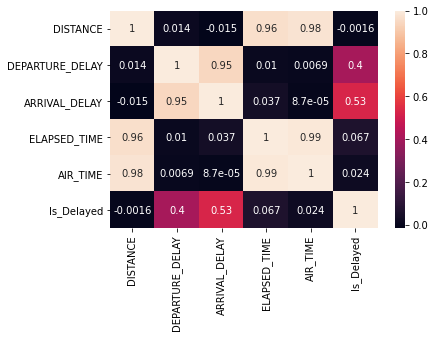

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Scheduled_Departure', 'DEPARTURE_DELAY',
       'Actual_Arrival', 'Scheduled_Arrival', 'ARRIVAL_DELAY', 'ELAPSED_TIME',
       'AIR_TIME', 'Is_Delayed'],
      dtype='object')

In [ ]:
dfnew = pd.DataFrame(Flights1)

corrMatrix = dfnew.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
Flights1.columns

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rfc = RandomForestRegressor(random_state=2)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [ ]:
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [ ]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])

In [ ]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Actual_Departure','ELAPSED_TIME','DIVERTED','AIR_TIME','DISTANCE'], axis = 1)

In [ ]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,TAXI_IN,TAXI_OUT
0,0,15,265,-11.0,-22.0,205,4.0,21.0
1,0,15,265,-4.0,-14.0,204,4.0,17.0
2,0,15,265,-15.0,-35.0,218,11.0,17.0
3,0,15,265,-11.0,-12.0,200,8.0,15.0
4,0,15,265,-8.0,-14.0,205,4.0,16.0
...,...,...,...,...,...,...,...,...
48688,3,187,229,7.0,10.0,35,3.0,11.0
48689,3,187,229,-4.0,-10.0,35,3.0,5.0
48690,3,187,229,57.0,51.0,35,4.0,8.0
48691,3,187,229,176.0,175.0,35,4.0,9.0


In [ ]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(48672, 7)

In [ ]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,TAXI_IN,TAXI_OUT
47516,3,141,49,1.0,91,4.0,25.0
15814,4,18,274,-1.0,262,5.0,20.0
41596,9,173,135,-5.0,255,4.0,25.0
12733,5,195,81,36.0,161,13.0,9.0
36963,9,167,185,6.0,240,8.0,14.0
...,...,...,...,...,...,...,...
24365,9,47,108,2.0,155,4.0,16.0
30802,3,295,142,29.0,97,9.0,14.0
25628,9,186,88,5.0,70,4.0,8.0
19345,12,167,100,-1.0,310,12.0,17.0


In [ ]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)
X_val=np.array([X.iloc[0]])
X_val_sc=sc1.fit_transform(X_val)

In [ ]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,TAXI_IN,TAXI_OUT
26020,1,82,35,38.0,205,6.0,20.0
39019,9,208,33,5.0,85,6.0,16.0
45170,9,47,155,37.0,125,4.0,8.0
42933,2,33,172,-4.0,120,5.0,10.0
3311,6,175,133,-7.0,32,6.0,6.0
...,...,...,...,...,...,...,...
44202,8,81,57,25.0,110,3.0,12.0
9189,4,115,206,3.0,176,4.0,13.0
29433,3,10,18,-10.0,95,6.0,9.0
24007,0,257,174,5.0,382,6.0,19.0


In [ ]:
predictRfc=Rfc.fit(X_train,y_train)
predictedValues = predictRfc.predict(X_test)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 6.991747795474853
MSE: 101.94080236485043
RMSE: 10.096573793364284
R2: 0.9439299848036636


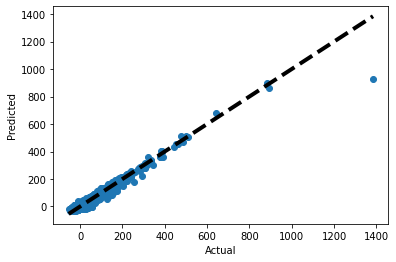

In [ ]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictedValues})
df

,Actual,Predicted
26020,27.0,29.76
39019,6.0,3.09
45170,27.0,28.28
42933,-13.0,-17.16
3311,-9.0,-5.25
...,...,...
44202,11.0,11.89
9189,-15.0,-8.06
29433,-16.0,-19.84
24007,7.0,3.68


In [ ]:
Rfc.score(X_test, y_test)

0.9439299848036636

In [ ]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,TAXI_IN,TAXI_OUT
26020,1,82,35,38.0,205,6.0,20.0
39019,9,208,33,5.0,85,6.0,16.0
45170,9,47,155,37.0,125,4.0,8.0
42933,2,33,172,-4.0,120,5.0,10.0
3311,6,175,133,-7.0,32,6.0,6.0
...,...,...,...,...,...,...,...
44202,8,81,57,25.0,110,3.0,12.0
9189,4,115,206,3.0,176,4.0,13.0
29433,3,10,18,-10.0,95,6.0,9.0
24007,0,257,174,5.0,382,6.0,19.0


In [ ]:
X_val=np.array([[9,88,227,10.0,270,8.0,45.0]])
X_val

array([[  9.,  88., 227.,  10., 270.,   8.,  45.]])

In [ ]:
y_val=predictRfc.predict(X_val)

In [ ]:
y_val

array([25.18])

### Applying Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train,y_train)
predictedValues = fitResultdtc.predict(X_test)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 10.155492398301602
MSE: 193.93704629502807
RMSE: 13.926128187512424
R2: 0.8933297278358069


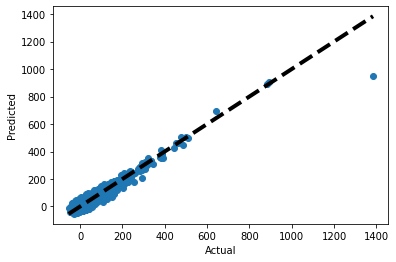

In [ ]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictedValues})
df

,Actual,Predicted
26020,27.0,53.0
39019,6.0,27.0
45170,27.0,22.0
42933,-13.0,-31.0
3311,-9.0,-6.0
...,...,...
44202,11.0,22.0
9189,-15.0,3.0
29433,-16.0,-17.0
24007,7.0,1.0


In [ ]:
Dtc.score(X_test, y_test)

0.8933297278358069

In [ ]:
X_val=np.array([[9,88,227,10.0,270,8.0,45.0]])
X_val

array([[  9.,  88., 227.,  10., 270.,   8.,  45.]])

In [ ]:
y_val= fitResultdtc.predict(X_val)
y_val

array([25.])

### XGBoost Regresion

In [ ]:
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 1000) 
xgb_r.fit(X_train, y_train) 


[15:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

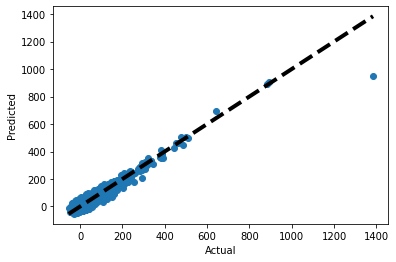

In [ ]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictedValues})
df

,Actual,Predicted
26020,27.0,53.0
39019,6.0,27.0
45170,27.0,22.0
42933,-13.0,-31.0
3311,-9.0,-6.0
...,...,...
44202,11.0,22.0
9189,-15.0,3.0
29433,-16.0,-17.0
24007,7.0,1.0


In [ ]:
xgb_r.score(X_test, y_test)

0.9597135660046675

In [ ]:
predictedValues = xgb_r.predict(X_test) 
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 5.916799657774402
MSE: 73.24469935530024
RMSE: 8.55831171173966
R2: 0.9597135660046676


In [ ]:
X_val=np.array([[9,88,227,10.0,270,8.0,45.0]])
X_val

array([[  9.,  88., 227.,  10., 270.,   8.,  45.]])

In [ ]:
y_val= fitResultdtc.predict(X_val)
y_val

array([25.])

Functions

In [ ]:
from sklearn.externals import joblib  
from sklearn.preprocessing import LabelEncoder
flightsinfo = pd.read_csv("drive/My Drive/flights.csv",nrows=50000)
airport = pd.read_csv('drive/My Drive/airports.csv')
airlines = pd.read_csv('drive/My Drive/airlines.csv')
from xgboost import XGBClassifier
classifierXGB = XGBClassifier(n_estimators=1000)
le = LabelEncoder()
flights=flightsinfo
Flights1 = flightsinfo
Flights1=flightsinfo.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','DEPARTURE_TIME','WHEELS_OFF','WHEELS_ON','SCHEDULED_ARRIVAL','ARRIVAL_TIME','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis = 1)
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)
Flights2=Flights1
airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
airport_dict = dict(zip(airport['IATA_CODE'],airport['AIRPORT']))
Flights1 = Flights1.dropna(subset = ['TAXI_IN','ARRIVAL_DELAY'])
X= Flights1.drop(['ELAPSED_TIME','DIVERTED','SCHEDULED_DEPARTURE','CANCELLED','FLIGHT_NUMBER','Is_Delayed','TAXI_IN'], axis = 1)
Flights1['DESC_AIRLINE'] = flightsinfo['AIRLINE'].apply(lambda x: airlines_dict[x])
Flights2['DESC_AIRLINE'] = flightsinfo['AIRLINE'].apply(lambda x: airlines_dict[x])
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)
X['AIRLINE']= le.fit_transform(X['AIRLINE'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
X['ORIGIN_AIRPORT'] = le.fit_transform(X['ORIGIN_AIRPORT'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
X['DESTINATION_AIRPORT'] = le.fit_transform(X['DESTINATION_AIRPORT'])
print(mapping['SEA'])
# X=X.drop(['ARRIVAL_DELAY'])
X = X.drop(['ARRIVAL_DELAY'],axis = 1)
y = Flights1['Is_Delayed']
classifierXGB.fit(X,y)
# print(X.columns)
joblib.dump(classifierXGB, 'drive/My Drive/xgbmodel.pkl') 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

268


['drive/My Drive/xgbmodel.pkl']

In [ ]:
from sklearn.externals import joblib  
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
classifierXGB = XGBClassifier(n_estimators=1000)
def recommend(src,dest):
  flightsinfo = pd.read_csv("drive/My Drive/flights.csv",nrows=200000)
  airport = pd.read_csv('drive/My Drive/airports.csv')
  airlines = pd.read_csv('drive/My Drive/airlines.csv')
  flights=flightsinfo
  Flights1 = flightsinfo
  Flights1=flightsinfo.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','DEPARTURE_TIME','WHEELS_OFF','WHEELS_ON','SCHEDULED_ARRIVAL','ARRIVAL_TIME','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis = 1)
  Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)
  Flights2=Flights1
  Flights1=Flights1.loc[(Flights1['ORIGIN_AIRPORT'] == src)  | (Flights1['DESTINATION_AIRPORT'] == dest)]
  Flights2=Flights2.loc[(Flights2['ORIGIN_AIRPORT'] == src)  & (Flights2['DESTINATION_AIRPORT'] == dest)]
  airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
  airport_dict = dict(zip(airport['IATA_CODE'],airport['AIRPORT']))
  Flights1 = Flights1.dropna(subset = ['TAXI_IN','ARRIVAL_DELAY'])
  X= Flights1.drop(['ELAPSED_TIME','DIVERTED','SCHEDULED_DEPARTURE','CANCELLED','FLIGHT_NUMBER','Is_Delayed','TAXI_IN'], axis = 1)
  Flights1['DESC_AIRLINE'] = flightsinfo['AIRLINE'].apply(lambda x: airlines_dict[x])
  Flights2['DESC_AIRLINE'] = flightsinfo['AIRLINE'].apply(lambda x: airlines_dict[x])
  Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)
  Flights2 = Flights2.dropna(subset = ['TAXI_IN','ARRIVAL_DELAY'])
  X['AIRLINE']= le.fit_transform(X['AIRLINE'])
  mapping = dict(zip(le.classes_, range(len(le.classes_))))
  # print(mapping['AS'])
  X['ORIGIN_AIRPORT'] = le.fit_transform(X['ORIGIN_AIRPORT'])
  mapping = dict(zip(le.classes_, range(len(le.classes_))))
  srcno=mapping[src]
  X['DESTINATION_AIRPORT'] = le.fit_transform(X['DESTINATION_AIRPORT'])
  X = X.drop(['ARRIVAL_DELAY'],axis = 1)
  mapping = dict(zip(le.classes_, range(len(le.classes_))))
  destno=mapping[dest]
  y = Flights1['Is_Delayed']
  X_test=X.loc[(X['ORIGIN_AIRPORT'] == srcno)  & (X['DESTINATION_AIRPORT'] == destno)]
  # return X_test
  xgb_from_joblib = joblib.load('drive/My Drive/xgbmodel_new.pkl')   
  y_pred=xgb_from_joblib.predict(X_test)
  Flights2['delayed']=y_pred
  Flights2=Flights2.loc[(Flights2['delayed'] == 0)]
  rank_airlines = pd.DataFrame(Flights2.groupby('DESC_AIRLINE').count()['SCHEDULED_DEPARTURE'])
  rank_airlines['CANCELLED']=Flights2.groupby('DESC_AIRLINE').sum()['CANCELLED']
  rank_airlines['OPERATED']=rank_airlines['SCHEDULED_DEPARTURE']-rank_airlines['CANCELLED']
  rank_airlines['RATIO_OP_SCH']=rank_airlines['OPERATED']/rank_airlines['SCHEDULED_DEPARTURE']
  rank_airlines.drop(rank_airlines.columns[[0,1,2]],axis=1,inplace=True)
  Flights2['FLIGHT_SPEED'] = 60*Flights2['DISTANCE']/Flights2['AIR_TIME']
  rank_airlines['FLIGHT_SPEED'] = Flights2.groupby('DESC_AIRLINE')['FLIGHT_SPEED'].mean()
  Flights2.groupby('DESC_AIRLINE')[['ARRIVAL_DELAY','DEPARTURE_DELAY']].mean()
  rank_airlines['ARRIVAL_DELAY']= Flights2.groupby('DESC_AIRLINE')['ARRIVAL_DELAY'].mean()
  rank_airlines['ARRIVAL_DELAY']=rank_airlines['ARRIVAL_DELAY'].apply(lambda x:x/60) 
  rank_airlines['FLIGHTS_VOLUME'] = Flights2.groupby('DESC_AIRLINE')['FLIGHT_NUMBER'].count()
  total = rank_airlines['FLIGHTS_VOLUME'].sum()
  rank_airlines['FLIGHTS_VOLUME'] = rank_airlines['FLIGHTS_VOLUME'].apply(lambda x:(x/float(total))) 
  for i in rank_airlines.columns:
      a = rank_airlines.RATIO_OP_SCH*rank_airlines.FLIGHT_SPEED*rank_airlines.FLIGHTS_VOLUME
      b = rank_airlines.ARRIVAL_DELAY
      rank_airlines['SCORE'] = a/(1+b)
      rank_airlines.sort_values(['SCORE'],ascending=False,inplace=True)
  # for i in range(len(rank_airlines)):print(rank_airlines.index[i])
  return rank_airlines['SCORE']
recommend('ANC','SEA')

DESC_AIRLINE
Alaska Airlines Inc.    527.376795
Delta Air Lines Inc.    143.598629
Name: SCORE, dtype: float64

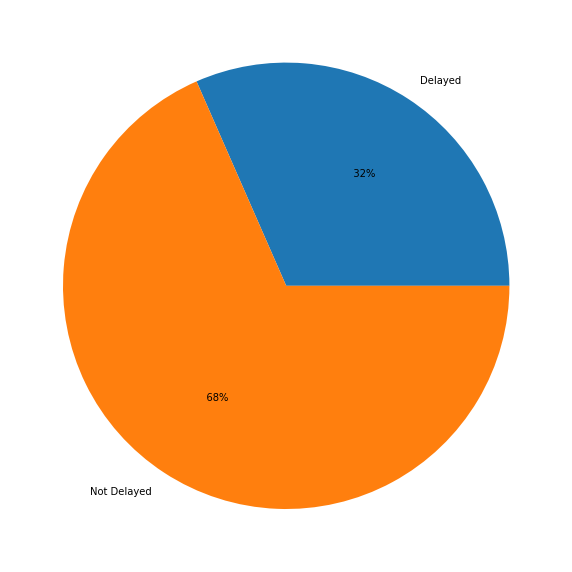

In [ ]:
def percentageofdelay(src,dest,airlinesname):
  flightsinfo = pd.read_csv("drive/My Drive/flights.csv",nrows=200000)
  airport = pd.read_csv('drive/My Drive/airports.csv')
  airlines = pd.read_csv('drive/My Drive/airlines.csv')
  flights=flightsinfo
  Flights1 = flightsinfo
  Flights1=flightsinfo.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','DEPARTURE_TIME','WHEELS_OFF','WHEELS_ON','SCHEDULED_ARRIVAL','ARRIVAL_TIME','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis = 1)
  # Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)
  Flights1=Flights1.loc[(Flights1['ORIGIN_AIRPORT'] == src)  & (Flights1['DESTINATION_AIRPORT'] == dest)  & (Flights1['AIRLINE'] == airlinesname)]
  Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
  mapping = dict(zip(le.classes_, range(len(le.classes_))))
  Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
  mapping = dict(zip(le.classes_, range(len(le.classes_))))
  srcno=mapping[src]
  Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
  Flights1 = Flights1.drop(['ARRIVAL_DELAY'],axis = 1)
  X_test=Flights1.drop(['ELAPSED_TIME','DIVERTED','SCHEDULED_DEPARTURE','CANCELLED','FLIGHT_NUMBER','TAXI_IN'], axis = 1)
  # return X_test
  xgb_from_joblib = joblib.load('drive/My Drive/xgbmodel_new.pkl')   
  y_pred=xgb_from_joblib.predict(X_test)
  Flights1['Is_Delayed']=y_pred
  totalcount=Flights1['Is_Delayed'].count()
  delayedcount=Flights1.loc[(Flights1['Is_Delayed'] == 1)]['Is_Delayed'].count()
  nodelayedcount=Flights1.loc[(Flights1['Is_Delayed'] == 0)]['Is_Delayed'].count()
  axis = plt.subplots(figsize=(10,14))
  Name = ['Delayed','Not Delayed']
  values = [(delayedcount/totalcount)*100,(nodelayedcount/totalcount)*100]
  plt.pie(values,labels=Name,autopct='%5.0f%%')
  plt.savefig('drive/My Drive/foo.png')
  return plt.show()
percentageofdelay('SFO','DFW','UA')

In [ ]:
def dornot_result(airlines_name,origin_airport,dest_airport,distance,departure_delay,scheduled_time,airtime,taxi_out):
  xgb_from_joblib = joblib.load('drive/My Drive/xgbmodel.pkl')  
  data = [[airlines_name,origin_airport,dest_airport,departure_delay,taxi_out,scheduled_time,airtime,distance]]
  df_final = pd.DataFrame(data,columns=['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY','TAXI_OUT','SCHEDULED_TIME','AIR_TIME','DISTANCE'])
  y_final_val=xgb_from_joblib.predict(df_final)
  return y_final_val
dornot_result(0,15,265,1448,-11.0,205,169.0,21.0)

array([0])

In [ ]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import pickle
import joblib  
flightsinfo = pd.read_csv("drive/My Drive/flights.csv",nrows=200000)
airport = pd.read_csv('drive/My Drive/airports.csv')
airlines = pd.read_csv('drive/My Drive/airlines.csv')
classifierXGB = XGBClassifier(n_estimators=1000)
le = LabelEncoder()
flights=flightsinfo
Flights1 = flightsinfo
Flights1=flightsinfo.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','DEPARTURE_TIME','WHEELS_OFF','WHEELS_ON','SCHEDULED_ARRIVAL','ARRIVAL_TIME','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis = 1)
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)
Flights2=Flights1
airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
airport_dict = dict(zip(airport['IATA_CODE'],airport['AIRPORT']))
Flights1 = Flights1.dropna(subset = ['TAXI_IN','ARRIVAL_DELAY'])
X= Flights1.drop(['ELAPSED_TIME','DIVERTED','SCHEDULED_DEPARTURE','CANCELLED','FLIGHT_NUMBER','Is_Delayed','TAXI_IN'], axis = 1)
Flights1['DESC_AIRLINE'] = flightsinfo['AIRLINE'].apply(lambda x: airlines_dict[x])
Flights2['DESC_AIRLINE'] = flightsinfo['AIRLINE'].apply(lambda x: airlines_dict[x])
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)
X['AIRLINE']= le.fit_transform(X['AIRLINE'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
X = X.drop(['ARRIVAL_DELAY'],axis = 1)
# print(mapping['AS'])
X['ORIGIN_AIRPORT'] = le.fit_transform(X['ORIGIN_AIRPORT'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
# print(mapping['LAX'])
X['DESTINATION_AIRPORT'] = le.fit_transform(X['DESTINATION_AIRPORT'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
y = Flights1['Is_Delayed']
classifierXGB.fit(X,y)
joblib.dump(classifierXGB, 'drive/My Drive/xgbmodel_new.pkl') 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['drive/My Drive/xgbmodel_new.pkl']